# Linear Regression with Gradient Descent

In [2]:
import numpy as np
import matplotlib.pyplot as plt

**Contents**

- [Gradient Descent](#1.-Gradient-Descent)
- [Linear Regression with Gradient Descent](#2.-Linear-Regression-with-Gradient-Descent)
- [Example](#3.-Example)
- [Gradient Descent step-by-step](#4.-Gradient-Descent-step-by-step)
- [Implementation](5.-Implementation)

## 1. Gradient Descent

**Gradient descent** is a name for a generic class of algorithms which minimize a function. 
These algorithms achieve this end by starting with initial parameter values and iteratively moving towards a set of parameter values that minimize some cost function or metric (that's the descent part).
The movement toward best-fit is achieved by taking the derivative of the variable or variables involved, towards the direction with the lowest gradient (that's the gradient part).

Gradient descent is based on the observation that a multi-variable function $F(x)$ decreases fastest if one goes moves  in the direction of the negative gradient of $F(x)$.

**Gradient Descent iteration:**

$$
x_n = x_{n-1} - s \nabla F(x_{n-1}),
$$

where the parameter $s$ is known as the learning rate.

Linear Regression is a good and simple way of demonstrating how gradient descent works.

## 2. Linear Regression with Gradient Descent

To train a linear (or polynomial) regression model we need to find the vector $\theta$ that minimizes

$$
\mbox{MSE}(\theta) = \frac{1}{m}\| y - X\theta \|_2^2,
$$

where $m$ is the size of the dataset.

To implement Gradient Descent, we need the gradient of the MSE function:

$$
\nabla\, \mbox{MSE}(\theta) = \frac{2}{m} \, X^T(X\theta - y).
$$

The **Gradient Descent iteration**  is:

$$
\theta_n = \theta_{n-1} - \frac{2s}{m} \, X^T(X\theta_{n-1}-y),
$$
where $s$ is called the **learning rate**.

# 3. Example

![](grad_des_anim.gif)

## 4. Gradient Descent step-by-step

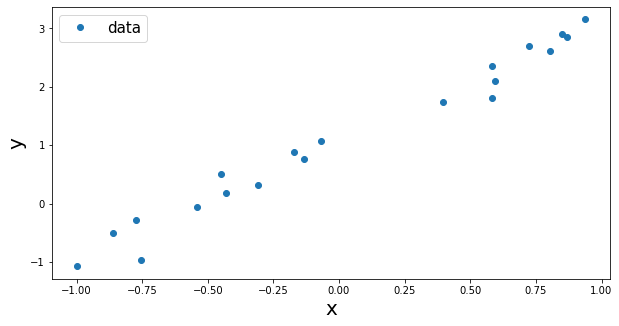

In [5]:
# generate and plot a toy dataset
m = 20 # number of points
x = -1 + 2*np.random.rand(m) # m random points over the interval [-1,1]
y = 2*x+1+0.25*np.random.randn(m) # y = 2x+1 + random noise
plt.figure(figsize=(10,5)) 
plt.plot(x,y,'o', label='data')
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.legend(fontsize=15, loc='upper left')

Let's look at a quick implementation of the Gradient Descent method. 

In [ ]:
m = len(x) # number of datapoints

In [7]:
X = np.ones((m,2)) # matrix X
X[:,1] = x
s = 0.1 # learning rate

Text(0.5, 1.0, 'MSE = 0.5593840126187402')

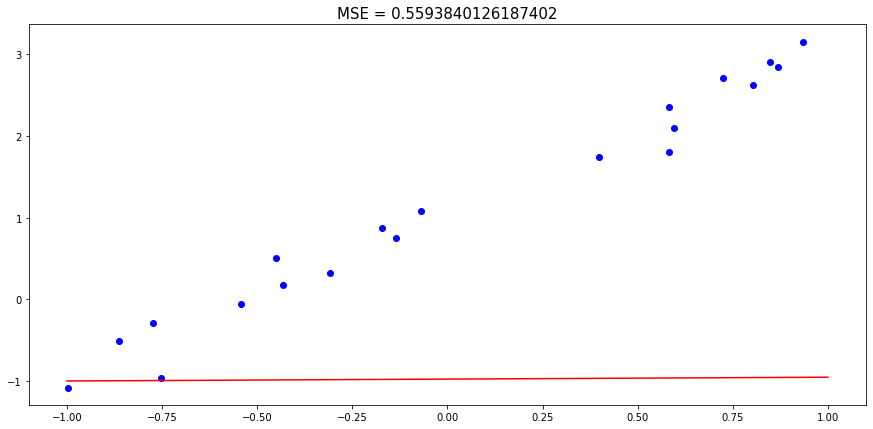

In [10]:
# Initialization:
theta = np.random.randn(2) # theta randomly chosen

# initial mean squared error
MSE = np.linalg.norm(X.dot(theta)-y)/m

#plot the data 
plt.figure(figsize=(15,7))
plt.plot(x,y,'bo')

# plot the linear regression model
m_plot = 100
x_plot = np.linspace(-1,1,100)
X_plot = np.ones((m_plot,2))
X_plot[:,1] = x_plot
y_plot = X_plot.dot(theta)
plt.plot(x_plot,y_plot,'r-')

plt.title('MSE = '+str(MSE),fontsize=15)

Text(0.5, 1.0, 'MSE = 0.07726317680576308')

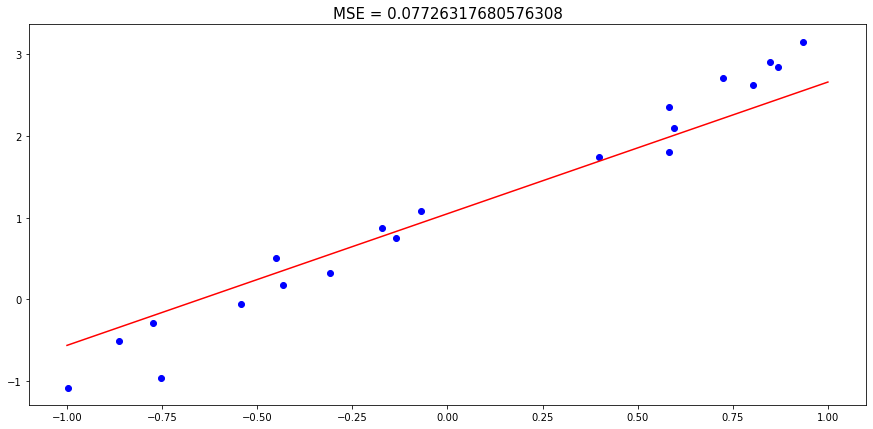

In [27]:
# Gradient Descent Step
gradient = (2/m)*X.T.dot(X.dot(theta)-y)
theta = theta - s*gradient

# Mean squared error
MSE = np.linalg.norm(X.dot(theta)-y)/m

#plot the data 
plt.figure(figsize=(15,7))
plt.plot(x,y,'bo')

# plot the linear regression model
y_plot = X_plot.dot(theta)
plt.plot(x_plot,y_plot,'r-')

plt.title('MSE = '+str(MSE),fontsize=15)

- if the learning rate is too small: convergence will take a long time
- If the learning rate is too large,  the algorithm may diverge.

## 5. Implementation

In [1]:
def linregression_GD(X,y,learning_rate, epochs):
    '''
    input: 
    - the matrix X
    - the vector y
    - learning rate
    - number of Gradient Descent iterations (epochs)
    
    ouput:
    - the vector theta
    - MSE: error at each iteration
    '''
    m,n = X.shape # size of data set, number of features
    theta = np.random.randn(n) # random initialization
    for iteration in range(epochs):
        gradient = (2/m)*X.T.dot(X.dot(theta)-y)
        theta = theta - learning_rate*gradient
        MSE[iteration] = np.linalg.norm(y-X.dot(theta))**2/m
    return theta,MSE

Text(0.5, 1.0, 'MSE = 0.058120061366089285')

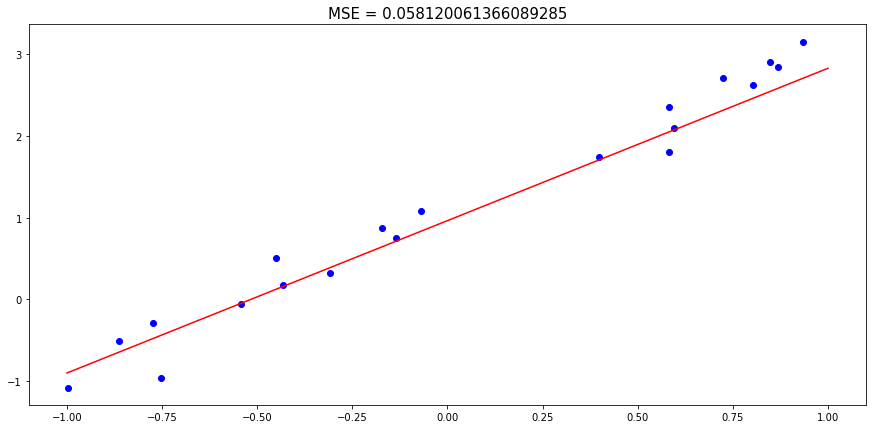

In [40]:
# check that the function works

theta = linregression_GD(X,y,learning_rate=0.1,epochs=10)

# Mean squared error
MSE = np.linalg.norm(X.dot(theta)-y)/m

#plot the data 
plt.figure(figsize=(15,7))
plt.plot(x,y,'bo')

# plot the linear regression model
y_plot = X_plot.dot(theta)
plt.plot(x_plot,y_plot,'r-')

plt.title('MSE = '+str(MSE),fontsize=15)